In [205]:
import numpy as np 
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [157]:
df = pd.read_csv('C:\\Users\\akhan...segmentation_data.csv', index_col = 0)

# 1) Explatory Analysis

In [158]:
# Sex = 0 : Men,
# Marital Status = 0 : Single
# Education = 1, 2, 3: high school, university, graduate school
# Occupation = 0, 1, 2: unemployed, skilled, highly qualified 
# Settlement size = 0, 1, 2: small, medium, big city 

In [159]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [160]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sex,2000.0,0.4570,0.498272,0.0,0.00,0.0,1.00,1.0
Marital status,2000.0,0.4965,0.500113,0.0,0.00,0.0,1.00,1.0
Age,2000.0,35.9090,11.719402,18.0,27.00,33.0,42.00,76.0
Education,2000.0,1.0380,0.599780,0.0,1.00,1.0,1.00,3.0
Income,2000.0,120954.4190,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0
Occupation,2000.0,0.8105,0.638587,0.0,0.00,1.0,1.00,2.0
Settlement size,2000.0,0.7390,0.812533,0.0,0.00,1.0,1.00,2.0


### Visualization 

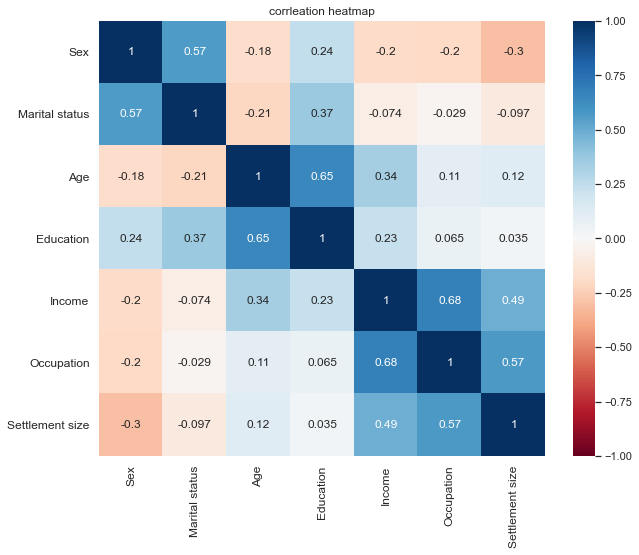

In [161]:
plt.figure(figsize = (10,8))
s = sns.heatmap(df.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('corrleation heatmap')
plt.show()

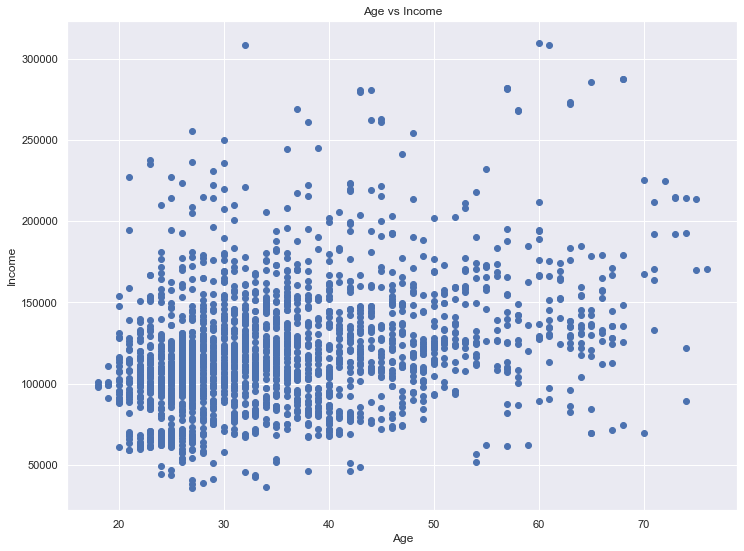

In [162]:
plt.figure(figsize = (12,9))
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()

# 2) Preprocessing

### Standardaztion

In [163]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# 3) Segmentation (K-means)

### Hierarchical Clustering

In [164]:
hier_clust = linkage(df_std, method = 'ward')


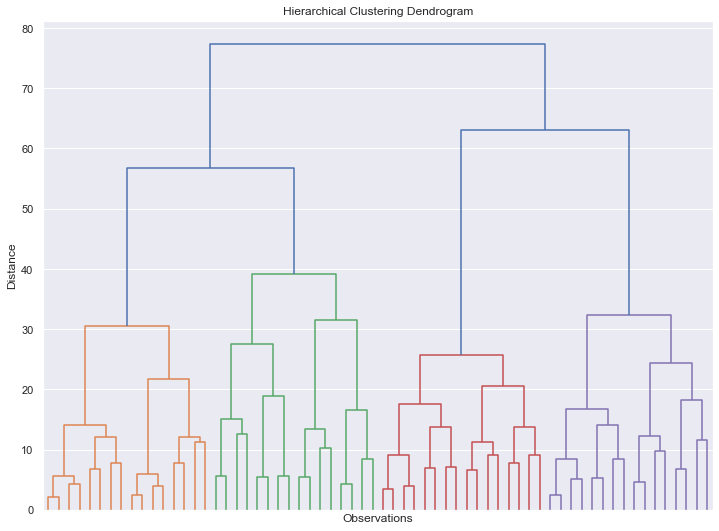

In [165]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

### K-means Clustering


In [166]:
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

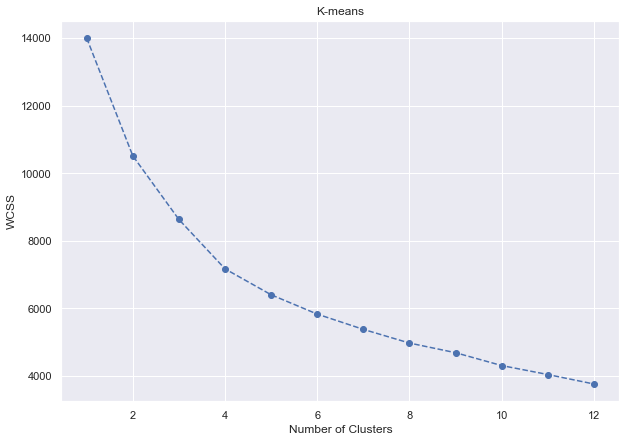

In [167]:
plt.figure(figsize = (10, 7))
plt.plot(range(1,13), wcss, marker = 'o', linestyle = '--')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.title('K-means')
plt.show()

#### result : simialr to hierarchical clustering, 4 clusters is sufficient.

In [184]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [185]:
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [186]:
df_seg = df.copy()
df_seg['Segment k-means'] = kmeans.labels_

In [187]:
df_seg

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment k-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,3
100001998,0,0,31,0,86400,0,0,1


In [188]:
df_seg_analysis = df_seg.groupby(['Segment k-means']).mean()
df_seg_analysis 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment k-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


##### Segment Analysis:

Segment 0: highly educated and older people and in a family with high income --> well-off segment.
Segment 1: single and less eduacted people with low income in small cities --> fewer opportunities segment.
Segment 2: almost all men, low education but high income and live in big cities --> career-focused segment.
Segment 3: youngest group with average income and education and married --> standard segment.


In [189]:
df_seg_analysis['Num Obs'] = df_seg[['Segment k-means', 'Age']].groupby(['Segment k-means']).count()

In [190]:
df_seg_analysis['Prop Obs']= df_seg_analysis['Num Obs']/df_seg_analysis['Num Obs'].sum()

In [191]:
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num Obs,Prop Obs
Segment k-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [194]:
df_seg_analysis.rename({0:'well-off', 
                       1:'fewer-opportunities',
                       2:'career focused',
                      3:'standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num Obs,Prop Obs
Segment k-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [195]:
df_seg['Segment'] = df_seg['Segment k-means'].map({0:'well-off', 
                       1:'fewer-opportunities',
                       2:'career focused',
                      3:'standard'})

C:\Software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


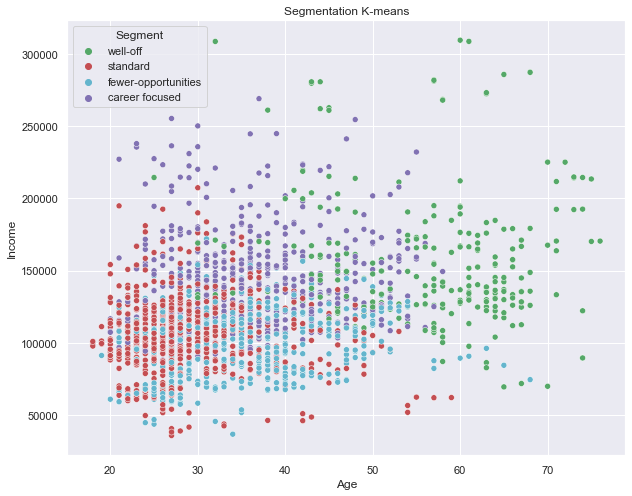

In [204]:
x_axis = df_seg['Age']
y_axis = df_seg['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_seg['Segment'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

# 4) Segmentation (PCA + K-means)

In [206]:
pca = PCA()

In [207]:
pca.fit(df_std)

PCA()

In [208]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

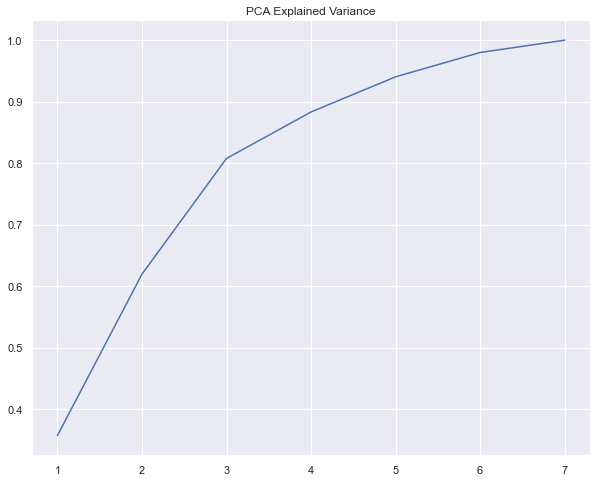

In [213]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum())
plt.title('PCA Explained Variance')
plt.show()

#### how many PCA components should we use. with 3 components we can explain 80% of data variation.

In [214]:
pca = PCA(n_components = 3)

In [215]:
pca.fit(df_std)

PCA(n_components=3)

In [216]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [224]:
df_pca_components = pd.DataFrame(data = pca.components_,
                                 columns = df.columns.values,
                                 index = ['Component 1','Component 2','Component 3'])
df_pca_components

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


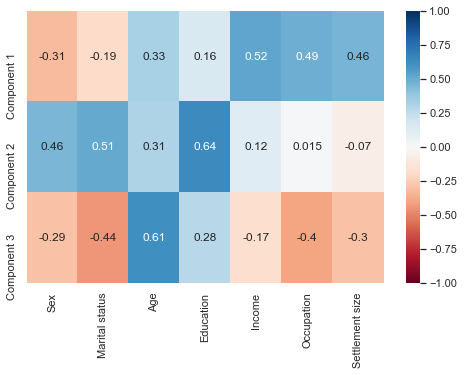

In [228]:
plt.figure(figsize = (8,5))
sns.heatmap(df_pca_components, 
           vmin = -1,
           vmax= 1,
           annot= True,
           cmap = 'RdBu')
plt.show()
        

### Anlysis of components:

#### Strong positive correlation between component 1 and (income, occupation, settlemenet size). so component 1 should be related to career of a person.

#### Strong positive correlation between component 2 and (sex, marital status, education). so component 2 should be related to education and life style of a person.

#### Strong correlation between component 3 and (age, marital status, occupation). so component 2 should be related to experience of a person (either in life or job)

In [230]:
pca.transform(df_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [231]:
pca_scores = pca.transform(df_std)

In [234]:
wcss = []
for i in range(1,13):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)



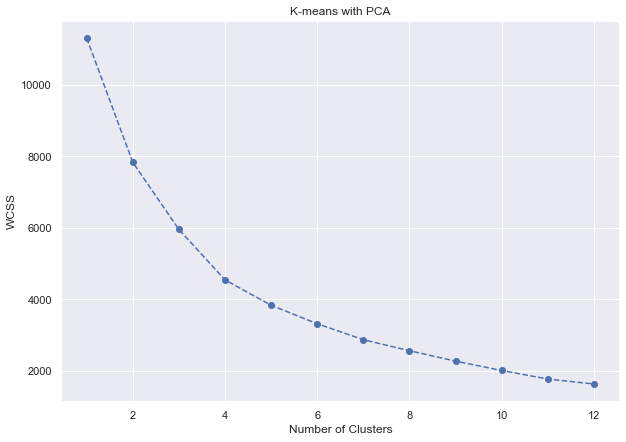

In [235]:
plt.figure(figsize = (10, 7))
plt.plot(range(1,13), wcss, marker = 'o', linestyle = '--')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.title('K-means with PCA')
plt.show()

In [236]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [237]:
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

In [243]:
df_seg_pca = pd.concat([df.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
df_seg_pca.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_seg_pca = ['Segment K-means PCA'] = kmeans_pca.labels_

In [244]:
df_seg_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [245]:
df_seg_pca_analysis = df_seg_pca.groupby(['Segment K-means PCA']).mean()

In [246]:
df_seg_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


In [250]:
df_seg_pca_analysis['Num Obs'] = df_seg_pca[['Segment K-means PCA', 'Age']].groupby(['Segment K-means PCA']).count()
df_seg_pca_analysis['Prop Obs']= df_seg_pca_analysis['Num Obs']/df_seg_pca_analysis['Num Obs'].sum()

In [253]:
df_seg_pca_analysis = df_seg_pca_analysis.rename({0:'fewer opportunities',
                                                   1:'career focused',
                                                   2:'standard',  
                                                  3:'well-off'})
df_seg_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Num Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
fewer opportunities,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.2295
career focused,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2925
standard,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.3465
well-off,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.1315


In [254]:
df_seg_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [255]:
df_seg_pca['Legend'] = df_seg_pca['Segment K-means PCA'].map({0:'fewer opportunities',
                                                   1:'career focused',
                                                   2:'standard',  
                                                  3:'well-off'})

In [256]:
df_seg_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0,fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0,fewer opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0,fewer opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2,standard


C:\Software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


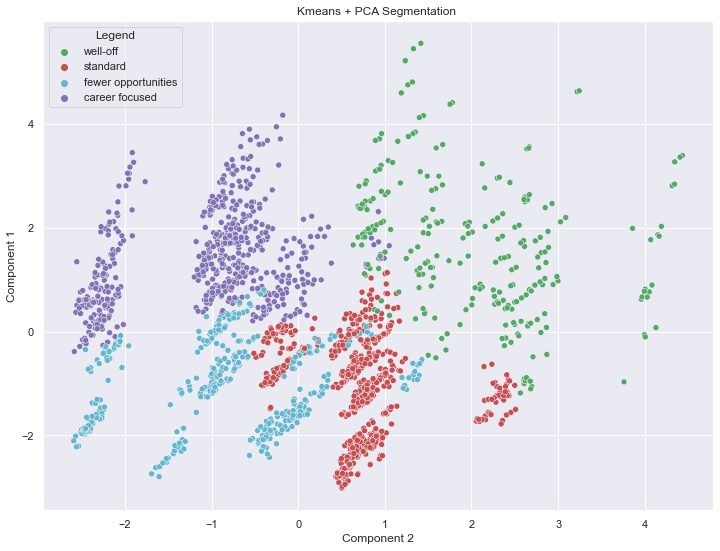

In [265]:
plt.figure(figsize = (12,9))
sns.scatterplot(df_seg_pca['Component 2'], df_seg_pca['Component 1'], hue = df_seg_pca['Legend'], 
               palette = ['g', 'r', 'c', 'm'])
plt.title('Kmeans + PCA Segmentation 1')
plt.show()